# Explorer le corpus

## Imports

In [208]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np
import yake

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
nlp = spacy.load('fr_core_news_md')

## Compter le nombre de documents dans le corpus

In [42]:
path = "../data/txt/"
files = sorted(os.listdir(path))

In [43]:
len(files)

2829

## Explorer les noms de fichier

In [44]:
chaine = 'Bxl_1901'

In [45]:
type(chaine)

str

In [46]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Bxl', '1901']

In [47]:
# Accéder à l'année
year = chaine_split[1]
year

'1901'

## Extraire les mots clés d'un document avec Yake

In [159]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général", "conseil", "conseil communal", "général", "d'un","d'une", 
               "c'est", "ordinaires", "chapitre", "titres", "recette dépense", "services", "dépenses", 
               "dépense", "dépenses dépenses prévues", "déficit recette dépense", "recette dépense prévue", 
               "boni recette dépense", "dépense recette boni", "recettes recettes", "dépenses dépenses", "qu'on", 
               "depenses dépenses recettes", "vases sacrés ordinaires", "sacrés ordinaires", "dépenses ordinaires qu'on", 
               "depenses dépenses recettes", "recettes imprévues. dépenses", "dit", "vue", "n’est", "avons", "d’une", "rue", 
               "Den Nest", "commune", "qu’il", "question", "ville", "c’est", "mais", "den Nest", "total", "art" ])
ignored

{'Den Nest',
 'art',
 'avons',
 'boni recette dépense',
 "c'est",
 'chapitre',
 'commune',
 'conseil',
 'conseil communal',
 'conseil général',
 'c’est',
 "d'un",
 "d'une",
 'den Nest',
 'depenses dépenses recettes',
 'dit',
 'déficit recette dépense',
 'dépense',
 'dépense recette boni',
 'dépenses',
 'dépenses dépenses',
 'dépenses dépenses prévues',
 "dépenses ordinaires qu'on",
 'd’une',
 'général',
 'mais',
 'n’est',
 'ordinaires',
 "qu'on",
 'question',
 'qu’il',
 'recette dépense',
 'recette dépense prévue',
 'recettes imprévues. dépenses',
 'recettes recettes',
 'rue',
 'sacrés ordinaires',
 'services',
 'titres',
 'total',
 'vases sacrés ordinaires',
 'ville',
 'vue'}

In [160]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [161]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [162]:
# Imprimer le nombre de fichiers identifiés
len(files)

2829

In [163]:
# Les 30 premiers fichiers
files[:30]

['.ipynb_checkpoints',
 'Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt',
 'Bxl_1848_Tome_I1_Part_2.txt',
 'Bxl_1848_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_1.txt',
 'Bxl_1849_Tome_I1_Part_2.txt',
 'Bxl_1849_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_4.txt',
 'Bxl_1849_Tome_I1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_1.txt',
 'Bxl_1849_Tome_II1_Part_2.txt',
 'Bxl_1849_Tome_II1_Part_3.txt',
 'Bxl_1849_Tome_II1_Part_4.txt',
 'Bxl_1849_Tome_II1_Part_5.txt',
 'Bxl_1849_Tome_II1_Part_6.txt',
 'Bxl_1849_Tome_II1_Part_7.txt',
 'Bxl_1850_Tome_I1_Part_1.txt',
 'Bxl_1850_Tome_I1_Part_2.txt',
 'Bxl_1850_Tome_I1_Part_3.txt',
 'Bxl_1850_Tome_I1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_1.txt',
 'Bxl_1850_Tome_II1_Part_2.txt',
 'Bxl_1850_Tome_II1_Part_3.txt',
 'Bxl_1850_Tome_II1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_5.txt']

In [164]:
# Enlever les fichiers qui ne commencent pas par Bxl_
bxl_files = [f for f in files if f.startswith('Bxl_1913')]
len(bxl_files)

36

In [165]:
# Les 20 premiers fichiers
bxl_files

['Bxl_1913_Tome_I1_Part_1.txt',
 'Bxl_1913_Tome_I1_Part_10.txt',
 'Bxl_1913_Tome_I1_Part_11.txt',
 'Bxl_1913_Tome_I1_Part_12.txt',
 'Bxl_1913_Tome_I1_Part_2.txt',
 'Bxl_1913_Tome_I1_Part_3.txt',
 'Bxl_1913_Tome_I1_Part_4.txt',
 'Bxl_1913_Tome_I1_Part_5.txt',
 'Bxl_1913_Tome_I1_Part_6.txt',
 'Bxl_1913_Tome_I1_Part_7.txt',
 'Bxl_1913_Tome_I1_Part_8.txt',
 'Bxl_1913_Tome_I1_Part_9.txt',
 'Bxl_1913_Tome_I2_1_Part_1.txt',
 'Bxl_1913_Tome_I2_1_Part_10.txt',
 'Bxl_1913_Tome_I2_1_Part_2.txt',
 'Bxl_1913_Tome_I2_1_Part_3.txt',
 'Bxl_1913_Tome_I2_1_Part_4.txt',
 'Bxl_1913_Tome_I2_1_Part_5.txt',
 'Bxl_1913_Tome_I2_1_Part_6.txt',
 'Bxl_1913_Tome_I2_1_Part_7.txt',
 'Bxl_1913_Tome_I2_1_Part_8.txt',
 'Bxl_1913_Tome_I2_1_Part_9.txt',
 'Bxl_1913_Tome_I2_2_Part_1.txt',
 'Bxl_1913_Tome_I2_2_Part_10.txt',
 'Bxl_1913_Tome_I2_2_Part_11.txt',
 'Bxl_1913_Tome_I2_2_Part_2.txt',
 'Bxl_1913_Tome_I2_2_Part_3.txt',
 'Bxl_1913_Tome_I2_2_Part_4.txt',
 'Bxl_1913_Tome_I2_2_Part_5.txt',
 'Bxl_1913_Tome_I2_2_Part_6.txt'

In [166]:
# Choisir un fichier
this_file = bxl_files [0]
this_file

'Bxl_1913_Tome_I1_Part_1.txt'

In [167]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:20000]

'V I L L E\n\nD E\n\nB R U X E L L E S .\n\nB U L L E T I N COMMUNAL\n•\n\n»Ô«\n\n—\n\nANNÉE\n\n1913\n\nP R E M I È R E\n\nP A R T I E\n\nTOME I\n\nC O M P T E\n\nR E N D U\n\nD E S\n\nS É A N C E S\n\nB R U X E L L E S\nTYPOGRAPHIE\n\nET L I T H O G R A P H I E\n\n12, rue P a c h é c o ,\n\n1«\n\nE.\n\nGUYOT\n\n\x0cBULLETIN\n\nCONSEIL\nSconce k\nPresideoce de M. Ä\n\n\x0cN°l.\n\nCOMPTE RENDU DE LA SÉANCE DU 1 3 JANVIER 1 9 1 3 .\n\nVILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN\nAnnée\n\nC O N S E I L\nSéance\n\nCOMMUNAL\n1913.\n\nC O M M U N A L\n\ndu 1 3 Janvier 1 9 1 3 .\n\nP r é s i d e n c e de M . A D O L P H E M A X , Bourgmestre.\n\nSOMMAIRE :\n\n1\n2\n3\n4.\n5.\n6.\n7.\n8\n\nPAGES.\nCommunication\n. . . .\n4\nPersonnel de l\'Administration communale. — D é l é g a t i o n\nà donner au Collège pour la nomination à divers\nemplois. — Adoption\n7\nRue Ernest-Allard — Prolongement vers la place Poelaert. — Id\n7,5\'J\nRue du Lombard. — Modification d\'alignement — Jd. .\n7\nEcoles professi

## Extraire les mots clés 

In [145]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [146]:
keywords

[('Camille Huysmans', 0.000427903383679709),
 ('CONSEIL', 0.0006517411601474442),
 ('Brassinne', 0.0007727378859341013),
 ('Conseil communal', 0.0009353746551778007),
 ('Hospices', 0.0010777637788410787),
 ('JANVIER', 0.0013280656084329844),
 ('BRUXELLES', 0.0013785330660554037),
 ('Conseil des hospices', 0.0013787805763346604),
 ('mais', 0.0013871310324885615),
 ('Bourgmestre', 0.0014657753408953544),
 ('Travaux', 0.0014888672327996516),
 ("C'est", 0.0016392320035753087),
 ('Jette', 0.0021273728955096345),
 ("l'Echevin Maes", 0.0022828099385902817),
 ("l'hôpital", 0.0025033448954019754),
 ('francs', 0.002533780645902713),
 ('VILLE', 0.00261723646084858),
 ('Question', 0.0026616976424051137),
 ('Messieurs', 0.0027241711241706526),
 ('commune de Jette', 0.002768460961091941),
 ('Camille', 0.002903424659748887),
 ('faire', 0.0030549852728522847),
 ('Huysmans', 0.003063398355807572),
 ('Collège', 0.003125091944814642),
 ('Conseil général', 0.003275023482197347),
 ("qu'il", 0.0033179196382

In [147]:
# Ne garder que les bonnes mots
kept = []
for kw, score in keywords:
    words = kw.split()
    if kw.lower() not in ignored:
        kept.append(kw)
kept

['Camille Huysmans',
 'Brassinne',
 'Hospices',
 'JANVIER',
 'BRUXELLES',
 'Conseil des hospices',
 'Bourgmestre',
 'Travaux',
 'Jette',
 "l'Echevin Maes",
 "l'hôpital",
 'francs',
 'Messieurs',
 'commune de Jette',
 'Camille',
 'faire',
 'Huysmans',
 'Collège',
 "qu'il",
 'Verheven',
 'den Nest',
 'VILLE DE BRUXELLES',
 'Bauwens',
 'Monsieur Brassinne',
 'Maes',
 'Travaux publics',
 "l'Echevin Hallet",
 'Huisman-Van den Nest',
 "l'Echevin",
 "L'honorable Bourgmestre",
 'février',
 "l'Administration des hospices",
 "n'est",
 "L'hôpital Brugmann",
 "l'Administration",
 'entrepreneurs',
 'terrain']

In [168]:
for f in sorted(bxl_files)[:10]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1913_Tome_I1_Part_1.txt mentions these keywords: camille huysmans, travaux publics, l'echevin maes, den nest...
Bxl_1913_Tome_I1_Part_10.txt mentions these keywords: avis favorable, dépenses ordinaires, d'un crédit, crédits supplémentaires, l'echevin hallet, l'echevin lemonnier, ressources ordinaires, vote d'un...
Bxl_1913_Tome_I1_Part_11.txt mentions these keywords: avis favorable, conseil d'administration, crédits supplémentaires, d'un crédit, rue d'anderlecht, conseiller communal, installations maritimes...
Bxl_1913_Tome_I1_Part_12.txt mentions these keywords: sous-institutrice primaire, conseiller communal, sous-instituteur primaire, primaire rue, sous-institutrice gardienne, écoles primaires, avis favorable...
Bxl_1913_Tome_I1_Part_2.txt mentions these keywords: avis favorable, dépenses ordinaires, service ordinaire, titres remboursables, camille huysmans, recettes ordinaires, titres sortis, l'echevin maes, avons l'honneur, services spéciaux...
Bxl_1913_Tome_I1_Part_3.txt ment

In [169]:
# Choisir une année
year = 1913

In [170]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1913_Tome_I1_Part_1.txt',
 'Bxl_1913_Tome_I1_Part_10.txt',
 'Bxl_1913_Tome_I1_Part_11.txt',
 'Bxl_1913_Tome_I1_Part_12.txt',
 'Bxl_1913_Tome_I1_Part_2.txt',
 'Bxl_1913_Tome_I1_Part_3.txt',
 'Bxl_1913_Tome_I1_Part_4.txt',
 'Bxl_1913_Tome_I1_Part_5.txt',
 'Bxl_1913_Tome_I1_Part_6.txt',
 'Bxl_1913_Tome_I1_Part_7.txt',
 'Bxl_1913_Tome_I1_Part_8.txt',
 'Bxl_1913_Tome_I1_Part_9.txt',
 'Bxl_1913_Tome_I2_1_Part_1.txt',
 'Bxl_1913_Tome_I2_1_Part_10.txt',
 'Bxl_1913_Tome_I2_1_Part_2.txt',
 'Bxl_1913_Tome_I2_1_Part_3.txt',
 'Bxl_1913_Tome_I2_1_Part_4.txt',
 'Bxl_1913_Tome_I2_1_Part_5.txt',
 'Bxl_1913_Tome_I2_1_Part_6.txt',
 'Bxl_1913_Tome_I2_1_Part_7.txt',
 'Bxl_1913_Tome_I2_1_Part_8.txt',
 'Bxl_1913_Tome_I2_1_Part_9.txt',
 'Bxl_1913_Tome_I2_2_Part_1.txt',
 'Bxl_1913_Tome_I2_2_Part_10.txt',
 'Bxl_1913_Tome_I2_2_Part_11.txt',
 'Bxl_1913_Tome_I2_2_Part_2.txt',
 'Bxl_1913_Tome_I2_2_Part_3.txt',
 'Bxl_1913_Tome_I2_2_Part_4.txt',
 'Bxl_1913_Tome_I2_2_Part_5.txt',
 'Bxl_1913_Tome_I2_2_Part_6.txt'

In [171]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [152]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

36

In [181]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{1913}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [182]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{1913}.txt'), 'r') as f:
    before = f.read()

before[:500]

'V I L L E\n\nD E\n\nB R U X E L L E S .\n\nB U L L E T I N COMMUNAL\n•\n\n»Ô«\n\n—\n\nANNÉE\n\n1913\n\nP R E M I È R E\n\nP A R T I E\n\nTOME I\n\nC O M P T E\n\nR E N D U\n\nD E S\n\nS É A N C E S\n\nB R U X E L L E S\nTYPOGRAPHIE\n\nET L I T H O G R A P H I E\n\n12, rue P a c h é c o ,\n\n1«\n\nE.\n\nGUYOT\n\n\x0cBULLETIN\n\nCONSEIL\nSconce k\nPresideoce de M. Ä\n\n\x0cN°l.\n\nCOMPTE RENDU DE LA SÉANCE DU 1 3 JANVIER 1 9 1 3 .\n\nVILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN\nAnnée\n\nC O N S E I L\nSéance\n\nCOMMUNAL\n1913.\n\nC O M M U N A L\n\ndu 1 3 Janvier 1 9 1 3 .\n\nP r é'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [192]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{1913}.txt"
        output_path = f"{1913}_clean.txt"
    else:
        input_path = f"{folder}/{1913}.txt"
        output_path = f"{folder}/{1913}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [193]:
clean_text(1913, folder=temp_path)

'Output has been written in ../data/tmp/1913_clean.txt!'

In [194]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{1913}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'communal année tome typographie rue guyot bulletin conseil sconce presideoce compte rendu séance janvier ville bruxelles bulletin année séance communal janvier bourgmestre sommaire pages communication personnel administration communale donner collège nomination divers emplois adoption rue ernest allard prolongement vers place poelaert rue lombard modification alignement ecoles professionnelles revision barème directrices hospices actes divers administration approbation culte anglican eglise résu'

## Nuage de mots

In [195]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('francs', 3245), ('rue', 2626), ('conseil', 1930), ('ville', 1929), ('bruxelles', 1727), ('collège', 1600), ('service', 1390), ('cours', 1257), ('frais', 1212), ('travaux', 1204), ('hospices', 1163), ('dépenses', 1093), ('communal', 1059), ('art', 1021), ('école', 1021), ('bourgmestre', 1014), ('total', 982), ('question', 924), ('echevin', 886), ('administration', 846)]


### Créer, stocker et afficher le nuage de mots

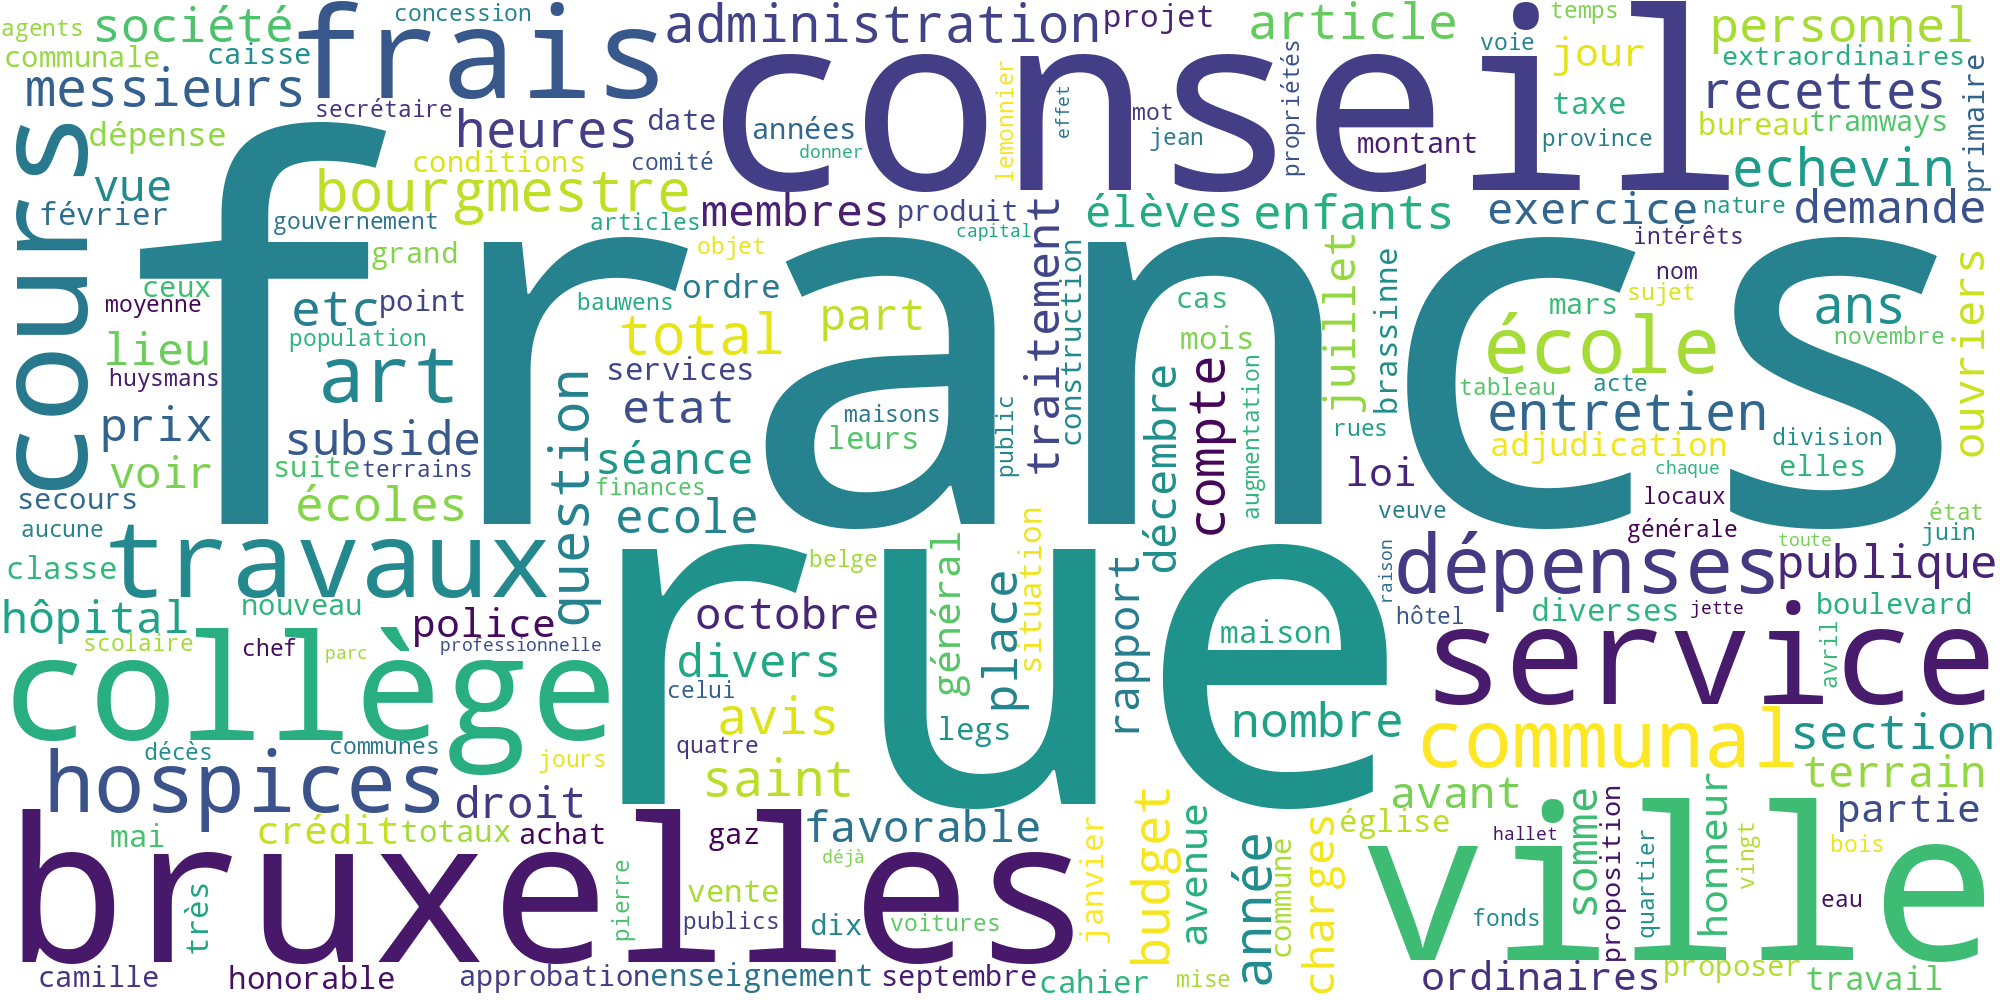

In [196]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{1913}.png"))
Image(filename=os.path.join(temp_path, f"{1913}.png"))

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [202]:
# Charger le texte
n=900000
text = open("../data/txt/Bxl_1913_Tome_I1_Part_11.txt", encoding='utf-8').read()[:n]

In [203]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 13.6 s, sys: 559 ms, total: 14.1 s
Wall time: 14.1 s


In [204]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [205]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Messieurs apparait 55 fois dans le corpus
Camille H u apparait 15 fois dans le corpus
Echevin J apparait 12 fois dans le corpus
Bourgmestre apparait 11 fois dans le corpus
Bauwens apparait 7 fois dans le corpus
Desmet apparait 7 fois dans le corpus
Recettes apparait 6 fois dans le corpus
Baleine apparait 5 fois dans le corpus
Adoption apparait 5 fois dans le corpus
Echevin apparait 5 fois dans le corpus
Camille Huysmans apparait 5 fois dans le corpus
Distribution apparait 4 fois dans le corpus
Echevin Hallet apparait 4 fois dans le corpus
p r é apparait 4 fois dans le corpus
Gouverneur apparait 4 fois dans le corpus
Echevin Jacqmain apparait 4 fois dans le corpus
q u i apparait 4 fois dans le corpus
Brugmann apparait 4 fois dans le corpus
M. le Bourgmestre apparait 4 fois dans le corpus
Décès de M apparait 4 fois dans le corpus
q u ' i apparait 3 fois dans le corpus
Eglise de Notre-Dame apparait 3 fois dans le corpus
Huysmans apparait 3 fois dans le corpus
Jules Anspach apparait 3 fois

# Sentiment analysis 

In [209]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [210]:
get_sentiment("Ensuite de cette entente, l'entrepreneur a pris rengagement de pousser ses travaux avec toute l'activité désirable.")

This text is 22% positive and 10% subjective.


In [212]:
get_sentiment("Toutes les indemnités allouées aux expropriés étant consignées, il sera loisible à l'Etat de prendre possession des immeubles dont il a fait poursuivre l'expropriation..")

This text is 11% positive and 5% subjective.


In [213]:
get_sentiment("Ce sont les immeubles qui dépendent de la Caisse générale de Reports et de Dépôts.")

This text is neutral and perfectly objective.


In [214]:
get_sentiment("Ces dépendances sont comprises dans la zone d'expropriation.")

This text is neutral and perfectly objective.


In [215]:
get_sentiment("Je n'entends pas les relever toutes aujourd'hui et je me contenterai de vous parler de la question des cheminées qui a été l'objet de polémiques.")

This text is 22% positive and 10% subjective.


In [216]:
get_sentiment("Pourquoi ne pas déléguer quelques membres du Conseil pour se rendre compte de l a situation et de l'exactitude de mes affirmations ?")

This text is neutral and perfectly objective.


In [217]:
get_sentiment("Voici cette réponse.")

This text is neutral and perfectly objective.


In [218]:
get_sentiment("Ce travail parait donner des résultats inespérés, comme les «témoins» d'essai l'indiquent.")

This text is 5% negative and perfectly objective.


In [219]:
get_sentiment("On ne peut méconnaître plus complètement la vérité.")

This text is 13% positive and 98% subjective.


In [220]:
get_sentiment("Le cahier des charges prévoyait les conditions d'épuisement.")

This text is neutral and perfectly objective.
